In [72]:
!python3 -m pip install --upgrade pip

In [73]:
!pip install seaborn==0.11.0

In [74]:
!python3 -m pip install pandas

In [75]:
!python3 -m pip install matplotlib

In [76]:
!python3 -m pip install seaborn

In [77]:
!python3 -m pip install sklearn

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [79]:
!dir

 C 드라이브의 볼륨: OS
 볼륨 일련 번호: 608B-C944

 C:\Users\sm\Documents\GitHub\dataeng\libs\da\heart_failure_clinic 디렉터리

2021-10-13  오후 05:05    <DIR>          .
2021-10-13  오후 05:05    <DIR>          ..
2021-10-12  오후 04:58    <DIR>          .ipynb_checkpoints
2021-10-12  오후 05:18    <DIR>          catboost_info
2021-10-13  오후 05:05            20,241 heartFP.ipynb
2021-10-12  오후 02:51            12,239 heart_failure_clinical_records_dataset.csv
               2개 파일              32,480 바이트
               4개 디렉터리  666,190,950,400 바이트 남음


In [80]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [81]:
df['age'] = df['age'].astype(int)

In [82]:
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [83]:
df.shape

(299, 13)

In [84]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 29.3 KB


In [86]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [87]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [88]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [89]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [90]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [91]:
df[(df['anaemia']==1)&(df['diabetes']==1)&(df['smoking']==1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
7,60,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
54,60,1,260,1,38,0,255000.00,2.20,132,0,1,45,1
78,75,1,203,1,38,1,283000.00,0.60,131,1,1,74,0
170,51,1,582,1,35,0,263358.03,1.50,136,1,1,145,0
181,59,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
193,73,1,231,1,30,0,160000.00,1.18,142,1,1,180,0
255,52,1,191,1,30,1,334000.00,1.00,142,1,1,216,0
274,60,1,257,1,30,0,150000.00,1.00,137,1,1,245,0
293,63,1,103,1,35,0,179000.00,0.90,136,1,1,270,0


<AxesSubplot:xlabel='age', ylabel='count'>

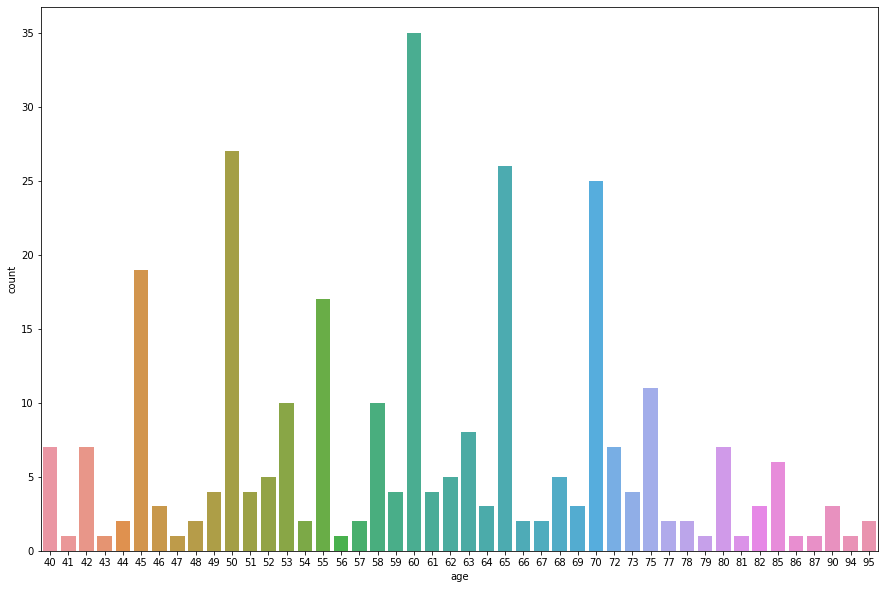

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(x='age', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

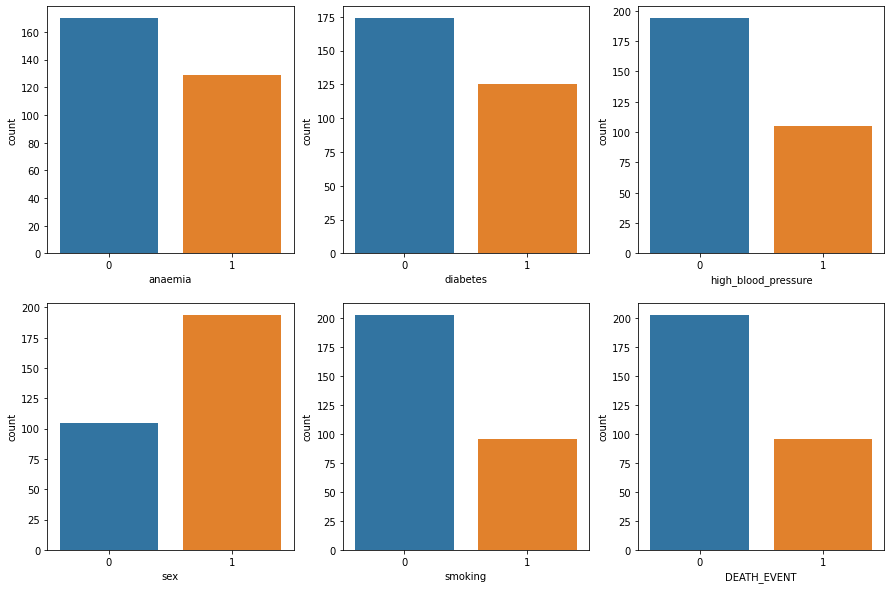

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x=df['anaemia'], data=df, ax=axes[0,0])
sns.countplot(x=df['diabetes'], data=df, ax=axes[0,1])
sns.countplot(x=df['high_blood_pressure'], data=df, ax=axes[0,2])
sns.countplot(x=df['sex'], data=df, ax=axes[1,0])
sns.countplot(x=df['smoking'], data=df, ax=axes[1,1])
sns.countplot(x=df['DEATH_EVENT'], data=df, ax=axes[1,2])

## train, test data split

In [94]:
x=df.drop('DEATH_EVENT', axis=1)
y=df['DEATH_EVENT']

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (239, 12)
x_test: (60, 12)
y_train: (239,)
y_test: (60,)


In [96]:
accuracy_list=[]
model_list=[]

## AdaBoost

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
ada_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
ada_model = ada_clf.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
ada_acc = accuracy_score(y_test, y_pred_ada)
accuracy_list.append(round(ada_acc*100, 2))
model_list.append("AdaBoost")
round(ada_acc*100, 2)

83.33

In [98]:
ada_clf.score(x_test, y_test)

0.8333333333333334

In [99]:
confusion_matrix(y_test, y_pred_ada)

array([[30,  6],
       [ 4, 20]], dtype=int64)

## XGBoost

In [100]:
!pip install xgboost

In [101]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
xgb_model=xgb_clf.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
accuracy_list.append(round(xgb_acc*100, 2))
model_list.append("XGBoost")
round(xgb_acc*100, 2)

[17:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


86.67

In [102]:
xgb_clf.score(x_test, y_test)

0.8666666666666667

In [103]:
confusion_matrix(y_test, y_pred_xgb)

array([[30,  6],
       [ 2, 22]], dtype=int64)

## GradientBoost

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
grb_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
grb_model = grb_clf.fit(x_train, y_train)
y_pred_grb = grb_model.predict(x_test)
grb_acc = accuracy_score(y_test, y_pred_grb)
accuracy_list.append(round(grb_acc*100, 2))
model_list.append("GradientBoost")
round(grb_acc*100, 2)

80.0

In [105]:
grb_clf.score(x_test, y_test)

0.8

In [106]:
confusion_matrix(y_test, y_pred_grb)

array([[27,  9],
       [ 3, 21]], dtype=int64)

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(x_train, y_train)
y_pred_log = log_reg_model.predict(x_test)
log_reg_acc = accuracy_score(y_test, y_pred_log)
accuracy_list.append(round(log_reg_acc*100,2))
model_list.append("Logistic Regression")
round(log_reg_acc*100,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.33

In [108]:
log_reg.score(x_test, y_test)

0.8833333333333333

In [109]:
confusion_matrix(y_test, y_pred_log)

array([[33,  3],
       [ 4, 20]], dtype=int64)

## Support Vector

In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
y_pred_sv = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, y_pred_sv)
accuracy_list.append(round(sv_clf_acc*100, 2))
model_list.append("SVC")
round(sv_clf_acc*100, 2)

60.0

In [111]:
sv_clf.score(x_test, y_test)

0.6

In [112]:
confusion_matrix(y_test, y_pred_sv)

array([[36,  0],
       [24,  0]], dtype=int64)

## KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
y_pred_kn = kn_clf.predict(x_test)
kn_clf_acc = accuracy_score(y_test, y_pred_kn)
accuracy_list.append(round(kn_clf_acc*100, 2))
model_list.append('KNN')
round(kn_clf_acc*100, 2)

60.0

In [114]:
kn_clf.score(x_test, y_test)

0.6

In [115]:
confusion_matrix(y_test, y_pred_kn)

array([[33,  3],
       [21,  3]], dtype=int64)

## DecisionTree

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)
dt_clf_acc = accuracy_score(y_test, y_pred_dt)
accuracy_list.append(round(dt_clf_acc*100, 2))
model_list.append('Decision Tree')
round(dt_clf_acc*100, 2)

73.33

In [117]:
dt_clf.score(x_test, y_test)

0.7333333333333333

In [118]:
confusion_matrix(y_test, y_pred_dt)

array([[23, 13],
       [ 3, 21]], dtype=int64)

## RandomForest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
y_pred_r = r_clf.predict(x_test)
r_clf_acc = accuracy_score(y_test, y_pred_r)
accuracy_list.append(round(r_clf_acc*100, 2))
model_list.append("Random Forest")
round(r_clf_acc*100, 2)

85.0

In [120]:
r_clf.score(x_test, y_test)

0.85

In [121]:
confusion_matrix(y_test, y_pred_r)

array([[30,  6],
       [ 3, 21]], dtype=int64)

In [122]:
!pip install lightgbm

## lightgbm

In [123]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
lgb_clf = LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(x_train,y_train)
y_pred_lgb = lgb_clf.predict(x_test)
lgb_clf_acc = accuracy_score(y_test, y_pred_lgb)
accuracy_list.append(round(lgb_clf_acc*100, 2))
model_list.append('LGBM')
round(lgb_clf_acc*100, 2)

80.0

In [124]:
lgb_clf.score(x_test, y_test)

0.8

In [125]:
confusion_matrix(y_test, y_pred_lgb)

array([[29,  7],
       [ 5, 19]], dtype=int64)

## CatBoost

In [126]:
!pip install catboost

In [127]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
y_pred_cat = cat_clf.predict(x_test)
cat_clf_acc = accuracy_score(y_test, y_pred_cat)
accuracy_list.append(round(cat_clf_acc*100, 2))
model_list.append('CatBoost')
round(cat_clf_acc*100, 2)

Learning rate set to 0.005591
0:	learn: 0.6894549	total: 1.25ms	remaining: 1.24s
1:	learn: 0.6851814	total: 2.37ms	remaining: 1.18s
2:	learn: 0.6804146	total: 3.49ms	remaining: 1.16s
3:	learn: 0.6761712	total: 4.67ms	remaining: 1.16s
4:	learn: 0.6713702	total: 5.84ms	remaining: 1.16s
5:	learn: 0.6670975	total: 6.86ms	remaining: 1.14s
6:	learn: 0.6628143	total: 8.02ms	remaining: 1.14s
7:	learn: 0.6586260	total: 9.17ms	remaining: 1.14s
8:	learn: 0.6541795	total: 10.1ms	remaining: 1.12s
9:	learn: 0.6494664	total: 11.2ms	remaining: 1.11s
10:	learn: 0.6459888	total: 12.1ms	remaining: 1.09s
11:	learn: 0.6420004	total: 12.9ms	remaining: 1.06s
12:	learn: 0.6377893	total: 13.8ms	remaining: 1.04s
13:	learn: 0.6339938	total: 14.4ms	remaining: 1.01s
14:	learn: 0.6306290	total: 15.2ms	remaining: 996ms
15:	learn: 0.6272720	total: 16ms	remaining: 983ms
16:	learn: 0.6226990	total: 16.8ms	remaining: 970ms
17:	learn: 0.6184706	total: 17.6ms	remaining: 958ms
18:	learn: 0.6148406	total: 18.3ms	remaining: 

86.67

In [128]:
cat_clf.score(x_test, y_test)

0.8666666666666667

In [129]:
confusion_matrix(y_test, y_pred_cat)

array([[31,  5],
       [ 3, 21]], dtype=int64)

In [130]:
accuracy_list

[83.33, 86.67, 80.0, 88.33, 60.0, 60.0, 73.33, 85.0, 80.0, 86.67]

In [131]:
model_list

['AdaBoost',
 'XGBoost',
 'GradientBoost',
 'Logistic Regression',
 'SVC',
 'KNN',
 'Decision Tree',
 'Random Forest',
 'LGBM',
 'CatBoost']

In [132]:
dataset = pd.DataFrame({'x':model_list, 'y':accuracy_list})
dataset

,x,y
0,AdaBoost,83.33
1,XGBoost,86.67
2,GradientBoost,80.00
3,Logistic Regression,88.33
4,SVC,60.00
5,KNN,60.00
6,Decision Tree,73.33
7,Random Forest,85.00
8,LGBM,80.00
9,CatBoost,86.67


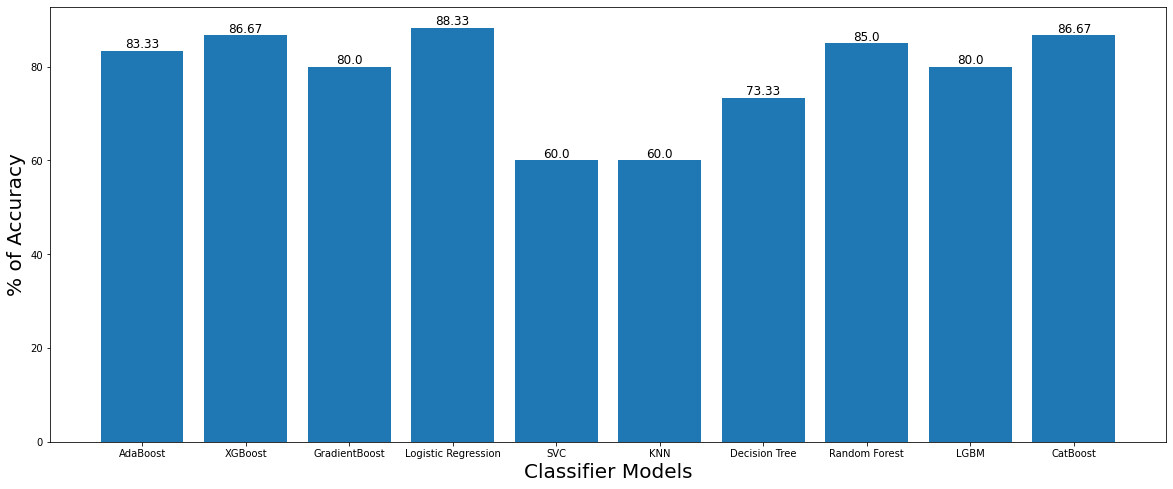

In [133]:
plt.rcParams['figure.figsize']=20,8
plt.xlabel('Classifier Models', fontsize = 20)
plt.ylabel('% of Accuracy', fontsize = 20)
plt.bar(model_list, accuracy_list)
for i, v in enumerate(model_list):
    plt.text(v, accuracy_list[i], accuracy_list[i],  # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize='large',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)